In this project, we'll analyze recent movie ratings data to determine whether there has been any change in Fandango's rating system after [Hickey's analysis](https://fivethirtyeight.com/features/fandango-movies-ratings/). Walt Hickey's investigation suggests that Fandango's rating system was biased and dishonest due to inflated ratings: the actual movie rating was almost always rounded up to the nearest half star displayed on Fandango's web page.

In [1]:
import pandas as pd

In [2]:
previous = pd.read_csv('fandango_score_comparison.csv')
current = pd.read_csv('movie_ratings_16_17.csv')

`previous` is the movie information from Hickey's analysis and `current` is movie rating data collected within 2016-17

We will now isolate only those columns from each data frame that offer information about Fandango's ratings

In [3]:
previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [4]:
current = current[['movie', 'year', 'fandango']]

In [5]:
previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [6]:
current.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


The population of interest for our goal are all movie ratings stored on Fandango's website, regardless of the release year.

From the `README.md` file for the second [Github repository](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) (after Hickey's analysis) it is evident that the sample is not representative of the population of interest, as they only sampled from the most popular movies.

From the `README.md` file for the first [Github repository](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md), it seems like the sampling was not random as Hickey only sampled from movies with at least 30 fan reviews. Therefore not all movies had an equal chance of being selected.

**Changing the Goal of our Analysis**

If we redefine the population of interest to be the set of all of the most popular movie ratings on Fandango's website, then we may be able to argue that the two samples above will now be representative of the population. We might define popular movies by a particular threshold for the Fandango rating. Note that we cannot define popularity via votes as the `current` data doesn't contain this information even though the `previous` data does.

Note that this should still be a good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

**Isolating the Samples We Need**

We will choose to define a popular movie as one that has at least 30 fan reviews.|

We need to verify that our two samples are representative of the population of interest now.

In [7]:
sum(previous['Fandango_votes'] < 30)

0

So, it appears that our `previous` data only contains popular movie information as promised.

The `current` data doesn't contain any information on the number of fan reviews, so we will sample 10 from our data at random and look up the number of fan reviews on Fandango's website to determine whether we have reason to believe that we are only looking at the most popular movies.

In [8]:
current.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of April 2019 the fan reviews that we found were as follows:
Mechanic: Resurrection 2,251
Warcraft: 7,284
Max Steel: 495
Me Before You: 5,274
Fantastic Beasts and Where to Find Them: 13,502
Cell: 18
Genius: 127
Sully: 11,890
A Hologram for the King: 501
Captain America: Civil War: 35,177

It looks like 90% of the movies are popular by our definition above which seems enough for us to continue with high confidence.

If you explore the data sets enough, you'll notice that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.

In [9]:
current['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [10]:
current_2016 = current[current['year'] == 2016 ]

In [11]:
previous['FILM'].str.extract('(\d{4})').value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


2015    129
2014     17
Name: FILM, dtype: int64

In [12]:
date_extracts = previous['FILM'].str.extract('(\d{4})')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [13]:
date_extracts = date_extracts.apply(lambda x: x == '2015')

In [14]:
previous_2015 = previous[date_extracts]

**Comparing Distribution Shapes for 2015 and 2016**


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
previous_2015.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [18]:
current_2016.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


([<matplotlib.axis.XTick at 0x7fdbc7e01438>,
 <a list of 10 Text xticklabel objects>)

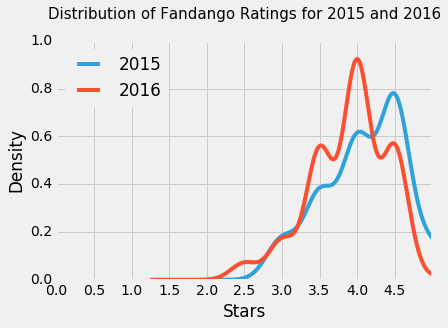

In [41]:


import numpy as np
plt.style.use('fivethirtyeight')
previous_2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
current_2016['fandango'].plot.kde(label='2016', legend=True)
#The y parameter pads the title upwards a bit
plt.title('Distribution of Fandango Ratings for 2015 and 2016', fontsize=15, y = 1.07)
plt.xlabel('Stars')
plt.ylabel('Density')
plt.xlim(0,5)
plt.xticks(np.arange(0,5,0.5))


From above, both of the distributions appear to be roughly skewed left. The 2015 distribution appears to be roughly shifted right from the 2016 distribution by about 0.5 stars. It is interesting to note that 0.5 stars was the inflated value by which the actual rating in 2015 differed from the displayed rating on Fandango's website 

**Comparing Relative Frequencies**

Since the two samples contain a different number of movies, it doesn't make much sense to compare absolute frequencies but rather relative frequencies.

In [46]:
previous_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [47]:
current_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings of 4.5 and 5 had significantly lower percentages than compared with 2015. In 2016, less than 1% of the movies had a perfect rating of 5 whereas there was close to 7% of the movies in 2015 that did. Also worth noting that the minimum rating in 2016 was lower (2.5) than in 2015 (3.0)

**Determining the Direction of the Change**

In [60]:
mean_2015 = previous_2015['Fandango_Stars'].mean()
median_2015 = previous_2015['Fandango_Stars'].median()
mode_2015 = previous_2015['Fandango_Stars'].mode()[0]

In [61]:
mean_2016 = current_2016['fandango'].mean()
median_2016 = current_2016['fandango'].median()
mode_2016 = current_2016['fandango'].mode()[0]

In [62]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


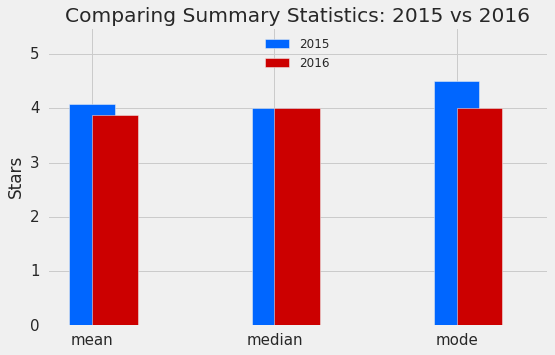

In [78]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF',label='2015', legend=True, align='center', width=0.25)
summary['2016'].plot.bar(color = '#CC0000',label='2016', legend=True, align='edge', width=0.25,
                        rot=0, figsize=(8,5), fontsize=15)
#rot=0 parameter ensures that the x axis labels aren't displayed vertically downward by default
plt.ylim(0,5.5)
plt.title('Comparing Summary Statistics: 2015 vs 2016')
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center', fontsize=12)

From above, we can see that the mean and mode rating in 2016 is slightly lower than that in 2015. The median rating was unchanged between the two years.

**Conclusions**

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.